In [1]:
import matplotlib.gridspec as gridspec
import scqubits
import numpy as np
from CoupledQuantumSystems.visualization import *
from CoupledQuantumSystems.systems import *
from tqdm import tqdm
from CoupledQuantumSystems.qobj_manip import *
import pickle
import matplotlib.pyplot as plt
linestyles = ['-','--','--']
linewidth_list = [1.75,1.75,1]

colors = ['#4999c3','#d5373d','black']

In [10]:
lim = 25
xvec = np.linspace(-1*lim,lim,500)
X, Y = np.meshgrid(xvec, xvec)

def plot_qfunc_cdf_contours(ax, q_values,color,lw,alpha,linestyle = '-',levels = [0.001,0.5,0.99, 0.999]):
    sorted_q = np.sort(q_values.ravel())
    cumulative_sum = np.cumsum(sorted_q)
    total_sum = cumulative_sum[-1]
    for prob in levels:
        level_value = sorted_q[np.argmax(cumulative_sum >= total_sum * (1 - prob))]
        contour = ax.contour(X, Y, q_values, levels=[level_value], colors=[color],lws=[lw],alpha=alpha,linestyles=[linestyle])


 /tmp/ipykernel_520457/2267181700.py: 17

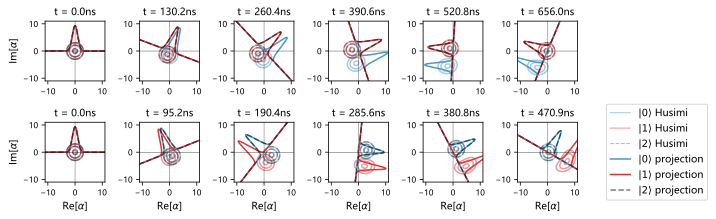

In [29]:
fig, axes = plt.subplots(2, 7, figsize=(10, 3.2),width_ratios=[3,3,3,3,3,3,4.5])

plt.subplots_adjust(wspace=0.05)
tot_time =660
tlist = np.linspace(0, tot_time, tot_time)[::5]
t_indices = [0, 26, 52,78,104,131]
with open('../ef_consistent/husimi_data_time_slices_5step.pkl', 'rb') as f:
    husimi_plotting_results = pickle.load(f)
for col, (t_idx, ax, result) in enumerate(zip(t_indices,
                                            [axes[0,0],axes[0,1],axes[0,2],axes[0,3],axes[0,4],axes[0,5]],
                                            husimi_plotting_results)):  # Only take first 6 axes
    q_values_leak, q_values_compu0, q_values_compu1,  theta,y_leak, y_compu0, y_compu1  = result

    theta = -theta[0]/180*np.pi
    if col == 0:
        theta = 0

    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                                [np.sin(theta), np.cos(theta)]])

    new_x_leak, new_y_leak =  np.dot(rotation_matrix,np.array([xvec, y_leak]))
    new_x_compu0, new_y_compu0 =  np.dot(rotation_matrix,np.array([xvec, y_compu0]))
    new_x_compu1, new_y_compu1 =  np.dot(rotation_matrix,np.array([xvec, y_compu1]))


    plot_qfunc_cdf_contours(ax, q_values_leak,color = colors[0],lw=1,alpha=0.5,levels = [0.3,0.9,0.99])
    plot_qfunc_cdf_contours(ax, q_values_compu0,color= colors[1],lw=1,alpha=0.5,levels = [0.3,0.9,0.99])
    plot_qfunc_cdf_contours(ax, q_values_compu1,color= 'black',lw=1,alpha=0.3,linestyle='--',levels = [0.3,0.9,0.99])

    ax.plot(new_x_leak, new_y_leak,color=colors[0],alpha=1)
    ax.plot(new_x_compu0, new_y_compu0,color=colors[1],alpha=1)
    ax.plot(new_x_compu1, new_y_compu1,color=colors[2],alpha=0.5,linestyle='--')
    ax.set_aspect('equal', 'box')


    ax.set_xlim(-11, 11)
    ax.set_ylim(-11, 11)
    ax.set_aspect('equal')
    ax.set_title(f"t = {tlist[t_idx]:.1f}ns", fontdict={'fontsize': 10})
    # ax.set_xticks([])
    # ax.set_yticks([])
    ax.tick_params(axis='both', which='major', labelsize=8)

    ax.axhline(y=0, color='black',lw=0.3)
    ax.axvline(x=0, color='black',lw=0.3)
    # ax.set_xlabel(rf'Re[$\alpha$]')
axes[0,0].set_ylabel(rf'Im[$\alpha$]')
axes[0,-1].axis('off')


tot_time =500
tlist = np.linspace(0, tot_time, tot_time)[::5]
t_indices = [0, 19, 38, 57, 76, 94]
with open('../gf_detection/husimi_data_time_slices.pkl', 'rb') as f:
    husimi_plotting_results = pickle.load(f)
for col, (t_idx, ax, result) in enumerate(zip(t_indices,
                                            [axes[1,0],axes[1,1],axes[1,2],axes[1,3],axes[1,4],axes[1,5]],
                                            husimi_plotting_results)): 
    q_values_leak, q_values_compu0, q_values_compu1,  theta,y_leak, y_compu0, y_compu1  = result

    theta = -theta[0]/180*np.pi
    if col == 0:
        theta = 0

    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                                [np.sin(theta), np.cos(theta)]])

    new_x_leak, new_y_leak =  np.dot(rotation_matrix,np.array([xvec, y_leak]))
    new_x_compu0, new_y_compu0 =  np.dot(rotation_matrix,np.array([xvec, y_compu0]))
    new_x_compu1, new_y_compu1 =  np.dot(rotation_matrix,np.array([xvec, y_compu1]))


    plot_qfunc_cdf_contours(ax, q_values_leak,color = colors[0],lw=1,alpha=0.5,levels = [0.3,0.9,0.99])
    plot_qfunc_cdf_contours(ax, q_values_compu0,color= colors[1],lw=1,alpha=0.5,levels = [0.3,0.9,0.99])
    plot_qfunc_cdf_contours(ax, q_values_compu1,color= 'black',lw=1,alpha=0.3,linestyle='--',levels = [0.3,0.9,0.99])

    ax.plot(new_x_leak, new_y_leak,color=colors[0],alpha=1)
    ax.plot(new_x_compu0, new_y_compu0,color=colors[1],alpha=1)
    ax.plot(new_x_compu1, new_y_compu1,color=colors[2],alpha=0.5,linestyle='--')
    ax.set_aspect('equal', 'box')


    ax.set_xlim(-11, 11)
    ax.set_ylim(-11, 11)
    ax.set_aspect('equal')
    ax.set_title(f"t = {tlist[t_idx]:.1f}ns", fontdict={'fontsize': 10})
    # ax.set_xticks([])
    # ax.set_yticks([])
    ax.tick_params(axis='both', which='major', labelsize=8)

    ax.axhline(y=0, color='black',lw=0.3)
    ax.axvline(x=0, color='black',lw=0.3)
    ax.set_xlabel(rf'Re[$\alpha$]')
axes[1,0].set_ylabel(rf'Im[$\alpha$]')
axes[1,-1].axis('off')

# Add the legend to the last column
legend_lines = [
    plt.Line2D([0], [0], color =  colors[0],lw=1,alpha=0.5, label=r'$|0\rangle$ Husimi'),
    plt.Line2D([0], [0],  color = colors[1],lw=1,alpha=0.5, label=r'$|1\rangle$ Husimi'),
    plt.Line2D([0], [0],color = 'black',lw=1,alpha=0.3,linestyle='--', label=r'$|2\rangle$ Husimi'),

    plt.Line2D([0], [0], color=colors[0], label=r'$|0\rangle$ projection'),
    plt.Line2D([0], [0], color=colors[1], label=r'$|1\rangle$ projection'),
    plt.Line2D([0], [0], color=colors[2], linestyle='--',alpha=0.5, label=r'$|2\rangle$ projection')
]
axes[1,-1].legend(handles=legend_lines, loc='center')

plt.tight_layout()
fig.savefig('Husimi_combined.pdf')

 /tmp/ipykernel_26448/2056800875.py: 11

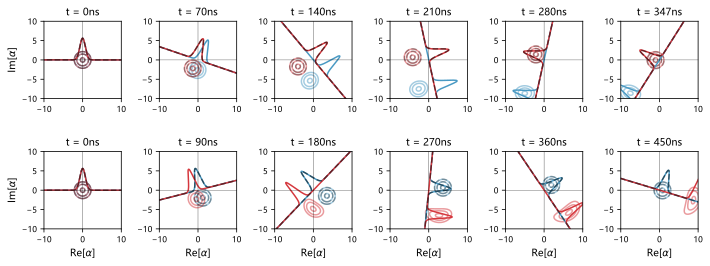

In [12]:
plot_lim = 10
fig, axes = plt.subplots(2, 6, figsize=(10, 4),width_ratios=[3,3,3,3,3,3])

plt.subplots_adjust(wspace=0.05)
tot_time =400
tlist = np.linspace(0, tot_time, tot_time)
t_indices = [0, 70, 140, 210, 280, 346]
with open('../ef_larger_drive/husimi_data_time_slices_5step_g2a015k003.pkl', 'rb') as f:
    husimi_plotting_results = pickle.load(f)

t_text = ['0','70','140','210','280','347']
for col, (t_idx, ax, result) in enumerate(zip(t_indices,
                                            [axes[0,0],axes[0,1],axes[0,2],axes[0,3],axes[0,4],axes[0,5]],
                                            husimi_plotting_results)):  # Only take first 6 axes
    q_values_leak, q_values_compu0, q_values_compu1,  theta,y_leak, y_compu0, y_compu1  = result

    theta = -theta[0]/180*np.pi
    if col == 0:
        theta = 0

    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                                [np.sin(theta), np.cos(theta)]])

    new_x_leak, new_y_leak =  np.dot(rotation_matrix,np.array([xvec, y_leak]))
    new_x_compu0, new_y_compu0 =  np.dot(rotation_matrix,np.array([xvec, y_compu0]))
    new_x_compu1, new_y_compu1 =  np.dot(rotation_matrix,np.array([xvec, y_compu1]))


    plot_qfunc_cdf_contours(ax, q_values_leak,color = colors[0],lw=1,alpha=0.5,levels = [0.3,0.9,0.99])
    plot_qfunc_cdf_contours(ax, q_values_compu0,color= colors[1],lw=1,alpha=0.5,levels = [0.3,0.9,0.99])
    plot_qfunc_cdf_contours(ax, q_values_compu1,color= 'black',lw=1,alpha=0.3,linestyle='--',levels = [0.3,0.9,0.99])

    ax.plot(new_x_leak, new_y_leak,color=colors[0],alpha=1)
    ax.plot(new_x_compu0, new_y_compu0,color=colors[1],alpha=1)
    ax.plot(new_x_compu1, new_y_compu1,color=colors[2],alpha=0.5,linestyle='--')
    ax.set_aspect('equal', 'box')


    ax.set_xlim(-plot_lim, plot_lim)
    ax.set_ylim(-plot_lim, plot_lim)
    ax.set_aspect('equal')
    ax.set_title(f"t = {t_text[col]}ns", fontdict={'fontsize': 10})
    # ax.set_xticks([])
    # ax.set_yticks([])
    ax.tick_params(axis='both', which='major', labelsize=8)

    ax.axhline(y=0, color='black',lw=0.3)
    ax.axvline(x=0, color='black',lw=0.3)
    # ax.set_xlabel(rf'Re[$\alpha$]')
axes[0,0].set_ylabel(rf'Im[$\alpha$]')
# axes[0,-1].axis('off')


tot_time =500
tlist = np.linspace(0, tot_time, tot_time)[::5]
t_indices =  [0, 90, 180, 270, 360, 449]
t_text =['0','90','180','270','360','450']
with open('../gf_new/husimi_data_time_slices.pkl', 'rb') as f:
    husimi_plotting_results = pickle.load(f)
for col, (t_idx, ax, result) in enumerate(zip(t_indices,
                                            [axes[1,0],axes[1,1],axes[1,2],axes[1,3],axes[1,4],axes[1,5]],
                                            husimi_plotting_results)): 
    q_values_leak, q_values_compu0, q_values_compu1,  theta,y_leak, y_compu0, y_compu1  = result

    theta = -theta[0]/180*np.pi
    if col == 0:
        theta = 0

    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                                [np.sin(theta), np.cos(theta)]])

    new_x_leak, new_y_leak =  np.dot(rotation_matrix,np.array([xvec, y_leak]))
    new_x_compu0, new_y_compu0 =  np.dot(rotation_matrix,np.array([xvec, y_compu0]))
    new_x_compu1, new_y_compu1 =  np.dot(rotation_matrix,np.array([xvec, y_compu1]))


    plot_qfunc_cdf_contours(ax, q_values_leak,color = colors[0],lw=1,alpha=0.5,levels = [0.3,0.9,0.99])
    plot_qfunc_cdf_contours(ax, q_values_compu0,color= colors[1],lw=1,alpha=0.5,levels = [0.3,0.9,0.99])
    plot_qfunc_cdf_contours(ax, q_values_compu1,color= 'black',lw=1,alpha=0.3,linestyle='--',levels = [0.3,0.9,0.99])

    ax.plot(new_x_leak, new_y_leak,color=colors[0],alpha=1)
    ax.plot(new_x_compu0, new_y_compu0,color=colors[1],alpha=1)
    ax.plot(new_x_compu1, new_y_compu1,color=colors[2],alpha=0.5,linestyle='--')
    ax.set_aspect('equal', 'box')


    ax.set_xlim(-plot_lim, plot_lim)
    ax.set_ylim(-plot_lim, plot_lim)
    ax.set_aspect('equal')
    ax.set_title(f"t = {t_text[col]}ns", fontdict={'fontsize': 10})
    # ax.set_xticks([])
    # ax.set_yticks([])
    ax.tick_params(axis='both', which='major', labelsize=8)

    ax.axhline(y=0, color='black',lw=0.3)
    ax.axvline(x=0, color='black',lw=0.3)
    ax.set_xlabel(rf'Re[$\alpha$]')
axes[1,0].set_ylabel(rf'Im[$\alpha$]')
# axes[1,-1].axis('off')

# # Add the legend to the last column
# legend_lines = [
#     plt.Line2D([0], [0], color =  colors[0],lw=1,alpha=0.5, label=r'$|0\rangle$ Husimi'),
#     plt.Line2D([0], [0],  color = colors[1],lw=1,alpha=0.5, label=r'$|1\rangle$ Husimi'),
#     plt.Line2D([0], [0],color = 'black',lw=1,alpha=0.3,linestyle='--', label=r'$|2\rangle$ Husimi'),

#     plt.Line2D([0], [0], color=colors[0], label=r'$|0\rangle$ projection'),
#     plt.Line2D([0], [0], color=colors[1], label=r'$|1\rangle$ projection'),
#     plt.Line2D([0], [0], color=colors[2], linestyle='--',alpha=0.5, label=r'$|2\rangle$ projection')
# ]
# axes[1,-1].legend(handles=legend_lines, loc='center')

plt.tight_layout()
fig.savefig('Husimi_no_legend_larger_drive.pdf')

 /tmp/ipykernel_26448/2056800875.py: 11

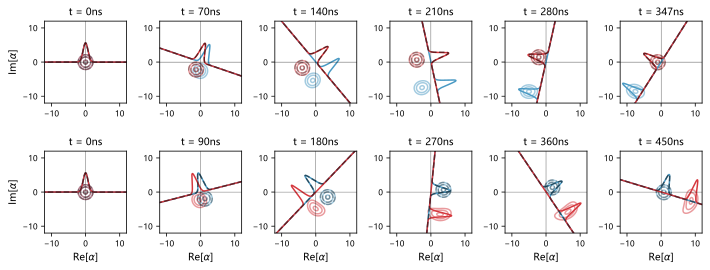

In [17]:
plot_lim = 12
fig, axes = plt.subplots(2, 6, figsize=(10, 4),width_ratios=[3,3,3,3,3,3])

plt.subplots_adjust(wspace=0.01)
tot_time =400
tlist = np.linspace(0, tot_time, tot_time)
t_indices = [0, 70, 140, 210, 280, 346]
with open('../ef_larger_drive/husimi_data_time_slices_5step_g2a015k003.pkl', 'rb') as f:
    husimi_plotting_results = pickle.load(f)

t_text = ['0','70','140','210','280','347']
for col, (t_idx, ax, result) in enumerate(zip(t_indices,
                                            [axes[0,0],axes[0,1],axes[0,2],axes[0,3],axes[0,4],axes[0,5]],
                                            husimi_plotting_results)):  # Only take first 6 axes
    q_values_leak, q_values_compu0, q_values_compu1,  theta,y_leak, y_compu0, y_compu1  = result

    theta = -theta[0]/180*np.pi
    if col == 0:
        theta = 0

    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                                [np.sin(theta), np.cos(theta)]])

    new_x_leak, new_y_leak =  np.dot(rotation_matrix,np.array([xvec, y_leak]))
    new_x_compu0, new_y_compu0 =  np.dot(rotation_matrix,np.array([xvec, y_compu0]))
    new_x_compu1, new_y_compu1 =  np.dot(rotation_matrix,np.array([xvec, y_compu1]))


    plot_qfunc_cdf_contours(ax, q_values_leak,color = colors[0],lw=1,alpha=0.5,levels = [0.3,0.9,0.99])
    plot_qfunc_cdf_contours(ax, q_values_compu0,color= colors[1],lw=1,alpha=0.5,levels = [0.3,0.9,0.99])
    plot_qfunc_cdf_contours(ax, q_values_compu1,color= 'black',lw=1,alpha=0.3,linestyle='--',levels = [0.3,0.9,0.99])

    ax.plot(new_x_leak, new_y_leak,color=colors[0],alpha=1)
    ax.plot(new_x_compu0, new_y_compu0,color=colors[1],alpha=1)
    ax.plot(new_x_compu1, new_y_compu1,color=colors[2],alpha=0.5,linestyle='--')
    ax.set_aspect('equal', 'box')


    ax.set_xlim(-plot_lim, plot_lim)
    ax.set_ylim(-plot_lim, plot_lim)
    ax.set_aspect('equal')
    ax.set_title(f"t = {t_text[col]}ns", fontdict={'fontsize': 10})
    # ax.set_xticks([])
    ax.set_yticks([-10,0,10])
    ax.tick_params(axis='both', which='major', labelsize=8)

    ax.axhline(y=0, color='black',lw=0.3)
    ax.axvline(x=0, color='black',lw=0.3)
    # ax.set_xlabel(rf'Re[$\alpha$]')
axes[0,0].set_ylabel(rf'Im[$\alpha$]')
# axes[0,-1].axis('off')


tot_time =500
tlist = np.linspace(0, tot_time, tot_time)[::5]
t_indices =  [0, 90, 180, 270, 360, 449]
t_text =['0','90','180','270','360','450']
with open('../gf_new/husimi_data_time_slices.pkl', 'rb') as f:
    husimi_plotting_results = pickle.load(f)
for col, (t_idx, ax, result) in enumerate(zip(t_indices,
                                            [axes[1,0],axes[1,1],axes[1,2],axes[1,3],axes[1,4],axes[1,5]],
                                            husimi_plotting_results)): 
    q_values_leak, q_values_compu0, q_values_compu1,  theta,y_leak, y_compu0, y_compu1  = result

    theta = -theta[0]/180*np.pi
    if col == 0:
        theta = 0

    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                                [np.sin(theta), np.cos(theta)]])

    new_x_leak, new_y_leak =  np.dot(rotation_matrix,np.array([xvec, y_leak]))
    new_x_compu0, new_y_compu0 =  np.dot(rotation_matrix,np.array([xvec, y_compu0]))
    new_x_compu1, new_y_compu1 =  np.dot(rotation_matrix,np.array([xvec, y_compu1]))


    plot_qfunc_cdf_contours(ax, q_values_leak,color = colors[0],lw=1,alpha=0.5,levels = [0.3,0.9,0.99])
    plot_qfunc_cdf_contours(ax, q_values_compu0,color= colors[1],lw=1,alpha=0.5,levels = [0.3,0.9,0.99])
    plot_qfunc_cdf_contours(ax, q_values_compu1,color= 'black',lw=1,alpha=0.3,linestyle='--',levels = [0.3,0.9,0.99])

    ax.plot(new_x_leak, new_y_leak,color=colors[0],alpha=1)
    ax.plot(new_x_compu0, new_y_compu0,color=colors[1],alpha=1)
    ax.plot(new_x_compu1, new_y_compu1,color=colors[2],alpha=0.5,linestyle='--')
    ax.set_aspect('equal', 'box')


    ax.set_xlim(-plot_lim, plot_lim)
    ax.set_ylim(-plot_lim, plot_lim)
    ax.set_aspect('equal')
    ax.set_title(f"t = {t_text[col]}ns", fontdict={'fontsize': 10})
    # ax.set_xticks([])
    ax.set_yticks([-10,0,10])
    ax.tick_params(axis='both', which='major', labelsize=8)

    ax.axhline(y=0, color='black',lw=0.3)
    ax.axvline(x=0, color='black',lw=0.3)
    ax.set_xlabel(rf'Re[$\alpha$]')
axes[1,0].set_ylabel(rf'Im[$\alpha$]')
# axes[1,-1].axis('off')

# # Add the legend to the last column
# legend_lines = [
#     plt.Line2D([0], [0], color =  colors[0],lw=1,alpha=0.5, label=r'$|0\rangle$ Husimi'),
#     plt.Line2D([0], [0],  color = colors[1],lw=1,alpha=0.5, label=r'$|1\rangle$ Husimi'),
#     plt.Line2D([0], [0],color = 'black',lw=1,alpha=0.3,linestyle='--', label=r'$|2\rangle$ Husimi'),

#     plt.Line2D([0], [0], color=colors[0], label=r'$|0\rangle$ projection'),
#     plt.Line2D([0], [0], color=colors[1], label=r'$|1\rangle$ projection'),
#     plt.Line2D([0], [0], color=colors[2], linestyle='--',alpha=0.5, label=r'$|2\rangle$ projection')
# ]
# axes[1,-1].legend(handles=legend_lines, loc='center')

plt.tight_layout()
fig.savefig('Husimi_no_legend_larger_drive.pdf')